# IMPORTACIÓN DE LIBRERIAS

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
import os
import graphviz
plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import zipfile
import pandas as pd

!pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# IMPORTACION DE DATOS Y RESUMEN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
archivo_ruta = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/datasets_TFM + diccionario/customer_commercial_activity.csv"
df_commercial_activity = pd.read_csv(archivo_ruta,index_col = 0)


archivo_ruta = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/datasets_TFM + diccionario/customer_products.csv"
df_customer_products = pd.read_csv(archivo_ruta,index_col = 0)


archivo_ruta = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/datasets_TFM + diccionario/customer_sociodemographics.csv"
df_socio_demo = pd.read_csv(archivo_ruta,index_col = 0)


archivo_ruta = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/datasets_TFM + diccionario/product_description.csv"
df_product_description = pd.read_csv(archivo_ruta,index_col = 0)


archivo_ruta = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/datasets_TFM + diccionario/sales.csv"
df_sales = pd.read_csv(archivo_ruta,index_col = 0)


In [ ]:
df_sales['cid'].nunique()

152754

## Info df

In [ ]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


In [ ]:
df_customer_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB


In [ ]:
df_socio_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


In [ ]:
df_product_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.0+ MB


## Head df

In [ ]:
df_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [ ]:
df_customer_products.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
df_socio_demo.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,ES,50.0,V,23,N,NaN


In [ ]:
df_product_description.head()

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account


In [ ]:
df_sales.head()

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2
2,6668,37299,2018-02-01,2335,1279.7
3,6669,39997,2018-02-01,2335,1511.9
4,6670,44012,2018-02-01,2335,1680.3


# PREPROCESSING

## df_commercial_activity

In [ ]:
# Ver cantidad de valores nulos
df_commercial_activity.isnull().sum()


,0
pk_cid,0
pk_partition,0
entry_date,0
entry_channel,133033
active_customer,0
segment,133944


In [ ]:
df_commercial_activity['entry_channel'] = df_commercial_activity['entry_channel'].fillna('missing')
df_commercial_activity['segment'] = df_commercial_activity['segment'].fillna('missing')


In [ ]:
# Ver cantidad de valores nulos tras la imputación
df_commercial_activity.isnull().sum()


,0
pk_cid,0
pk_partition,0
entry_date,0
entry_channel,0
active_customer,0
segment,0


In [ ]:
# Ver duplicados por cliente y mes
df_commercial_activity.duplicated(subset=['pk_cid', 'pk_partition']).sum()


np.int64(0)

In [ ]:
# Date time
df_commercial_activity['pk_partition'] = pd.to_datetime(df_commercial_activity['pk_partition'], errors='coerce')
df_commercial_activity['entry_date'] = pd.to_datetime(df_commercial_activity['entry_date'], errors='coerce')


In [ ]:
# Ver categorías frecuentes
print(df_commercial_activity['entry_channel'].value_counts())
print(df_commercial_activity['segment'].value_counts())


entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: count, Length: 69, dtype: int64
segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
missing                133944
01 - TOP                97939
Name: count, dtype: int64


In [ ]:
# Agrupar entry_channel poco frecuentes
entry_threshold = 0.01 * len(df_commercial_activity)
frequent_channels = df_commercial_activity['entry_channel'].value_counts()[lambda x: x > entry_threshold].index
df_commercial_activity['entry_channel'] = df_commercial_activity['entry_channel'].apply(lambda x: x if x in frequent_channels else 'Other')

# Igual para segment
segment_threshold = 0.01 * len(df_commercial_activity)
frequent_segments = df_commercial_activity['segment'].value_counts()[lambda x: x > segment_threshold].index
df_commercial_activity['segment'] = df_commercial_activity['segment'].apply(lambda x: x if x in frequent_segments else 'Other')


In [ ]:
# 1. Convertir tipos
df_commercial_activity['pk_cid'] = df_commercial_activity['pk_cid'].astype(str)  # es un ID
df_commercial_activity['pk_partition'] = pd.to_datetime(df_commercial_activity['pk_partition'])
df_commercial_activity['entry_date'] = pd.to_datetime(df_commercial_activity['entry_date'])
df_commercial_activity['active_customer'] = df_commercial_activity['active_customer'].astype(bool)

# 3. Imputar valores nulos en categóricas
df_commercial_activity['entry_channel'] = df_commercial_activity['entry_channel'].fillna('missing')
df_commercial_activity['segment'] = df_commercial_activity['segment'].fillna('missing')

# 4. Verificar resultado
df_commercial_activity.info()
df_commercial_activity.head()


<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  bool          
 5   segment          object        
dtypes: bool(1), datetime64[ns](2), object(3)
memory usage: 278.6+ MB


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,Other,True,02 - PARTICULARES
1,1050611,2018-01-01,2015-08-01,KHE,False,03 - UNIVERSITARIO
2,1050612,2018-01-01,2015-08-01,KHE,False,03 - UNIVERSITARIO
3,1050613,2018-01-01,2015-08-01,KHD,False,03 - UNIVERSITARIO
4,1050614,2018-01-01,2015-08-01,KHE,True,03 - UNIVERSITARIO


In [ ]:
# 2. Normalizar 'segment' → quitar el prefijo (número y guión)
df_commercial_activity['segment'] = df_commercial_activity['segment'].str.extract(r'\d+\s*-\s*(.*)', expand=False).str.strip()

# 3. Convertir 'active_customer' a 0 y 1
df_commercial_activity['active_customer'] = df_commercial_activity['active_customer'].astype(int)

In [ ]:
df_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,Other,1,PARTICULARES
1,1050611,2018-01-01,2015-08-01,KHE,0,UNIVERSITARIO
2,1050612,2018-01-01,2015-08-01,KHE,0,UNIVERSITARIO
3,1050613,2018-01-01,2015-08-01,KHD,0,UNIVERSITARIO
4,1050614,2018-01-01,2015-08-01,KHE,1,UNIVERSITARIO


In [ ]:
df_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  int64         
 5   segment          object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 318.5+ MB


In [ ]:

variables_fecha_comercial = ['pk_partition', 'entry_date']
variables_categoricas_comercial = ['entry_channel', 'segment','pk_cid']
variables_booleanas_comercial = ['active_customer']


## df_customer_products

In [ ]:
# Verificar valores nulos
print(df_customer_products.isnull().sum())

# Verificar duplicados
print("Duplicados:", df_customer_products.duplicated().sum())


pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64
Duplicados: 0


In [ ]:
# Rellenar nulos con 0 (asumiendo que significa no aplica o no tiene ese ingreso)
df_customer_products['payroll'] = df_customer_products['payroll'].fillna(0)
df_customer_products['pension_plan'] = df_customer_products['pension_plan'].fillna(0)


In [ ]:
df_customer_products.head(10)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
5,1050615,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
6,1050616,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
7,1050617,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
8,1050619,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
9,1050620,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
variables_categoricas_customer_products = ['pk_cid', 'pk_partition']  # ID, no usar como numérica
variables_booleanas_customer_products = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll_account',
    'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'payroll', 'pension_plan'
]



In [ ]:
# Asegurar que los booleanos son 0/1
for col in variables_booleanas_customer_products:
    df_customer_products[col] = df_customer_products[col].apply(lambda x: 1 if x == 1 else 0)


In [ ]:
df_customer_products['payroll'] = df_customer_products['payroll'].fillna(0).astype(int)
df_customer_products['pension_plan'] = df_customer_products['pension_plan'].fillna(0).astype(int)


In [ ]:
# 3. Convertir pk_cid a string para tratarlo como categórica
df_customer_products['pk_cid'] = df_customer_products['pk_cid'].astype(str)

# Convertir pk_cid a string para tratarlo como categórica

df_customer_products['pk_partition'] = pd.to_datetime(df_customer_products['pk_partition'])  # Fecha

In [ ]:
df_customer_products.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             int64         
 11  pension_plan        int64         
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), int64(15), object(1)
memory usage: 818.9+ MB


In [ ]:
df_customer_products.nunique()

,0
pk_cid,456373
pk_partition,17
short_term_deposit,2
loans,2
mortgage,2
funds,2
securities,2
long_term_deposit,2
em_account_pp,1
credit_card,2


In [ ]:
# Revisar proporción de 1's en cada variable booleana
total_filas = len(df_customer_products)

print("Proporción de clientes con valor 1 por variable booleana:\n")
for col in variables_booleanas_customer_products:
    n_positivos = df_customer_products[col].sum()
    porcentaje = n_positivos / total_filas * 100
    print(f"{col:<20}: {n_positivos:>7} casos positivos ({porcentaje:.2f}%)")


Proporción de clientes con valor 1 por variable booleana:

short_term_deposit  :   15394 casos positivos (0.26%)
loans               :     468 casos positivos (0.01%)
mortgage            :     324 casos positivos (0.01%)
funds               :   20099 casos positivos (0.34%)
securities          :   22133 casos positivos (0.37%)
long_term_deposit   :  100660 casos positivos (1.69%)
em_account_pp       :       0 casos positivos (0.00%)
credit_card         :   70866 casos positivos (1.19%)
payroll_account     :  329420 casos positivos (5.52%)
emc_account         :  326961 casos positivos (5.48%)
debit_card          :  562968 casos positivos (9.44%)
em_account_p        :      34 casos positivos (0.00%)
em_acount           : 4381602 casos positivos (73.48%)
payroll             :  205787 casos positivos (3.45%)
pension_plan        :  217802 casos positivos (3.65%)


In [ ]:
# Eliminamos em_account_pp y em_account_p ya que tienen muy poca variación
df_customer_products = df_customer_products.drop(columns=['em_account_pp', 'em_account_p'])

In [ ]:
variables_categoricas_customer_products = ['pk_cid', 'pk_partition']  # ID, no usar como numérica
variables_booleanas_customer_products = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'credit_card', 'payroll_account',
    'emc_account', 'debit_card', 'em_acount', 'payroll', 'pension_plan'
]


## df_socio_demo

In [ ]:
#nulos
df_socio_demo.isnull().sum()

,0
pk_cid,0
pk_partition,0
country_id,0
region_code,2264
gender,25
age,0
deceased,0
salary,1541104


In [ ]:
df_socio_demo.head(20)


,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,ES,50.0,V,23,N,NaN
5,1050615,2018-01,ES,45.0,H,23,N,22220.04
6,1050616,2018-01,ES,24.0,H,23,N,295590.36
7,1050617,2018-01,ES,50.0,H,23,N,113316.66
8,1050619,2018-01,ES,20.0,H,24,N,NaN
9,1050620,2018-01,ES,10.0,H,23,N,113194.98


In [ ]:
# Imputar los nulos de gender con la moda
modo_gender = df_socio_demo['gender'].mode()[0]
df_socio_demo['gender'].fillna(modo_gender, inplace=True)


In [ ]:
#quiero ver los valores de region code y country id
print(df_socio_demo['region_code'].value_counts())
print(df_socio_demo['country_id'].value_counts())

region_code
28.0    1185757
8.0      600362
46.0     358142
30.0     296856
41.0     290447
15.0     254891
29.0     187911
36.0     175850
3.0      171358
11.0     160894
33.0     134562
50.0     132983
6.0      122587
35.0     121982
47.0     116948
18.0     102789
45.0     102328
37.0      92538
10.0      83283
14.0      75405
2.0       72071
21.0      72037
13.0      70092
39.0      69589
12.0      68709
7.0       62436
32.0      54639
27.0      52783
43.0      51782
17.0      50749
9.0       47746
25.0      46887
16.0      36094
24.0      35426
48.0      35256
26.0      34790
4.0       32680
31.0      31241
49.0      30965
23.0      30955
38.0      29001
34.0      27545
19.0      26762
40.0      21658
5.0       21300
22.0      21112
20.0      18833
1.0       12999
44.0      12616
42.0       8500
51.0       2896
52.0       2638
Name: count, dtype: int64
country_id
ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE     

In [ ]:
# Agrupamos, quedarán dos categorías, es de ES o no es de ES
df_socio_demo['country_id'] = df_socio_demo['country_id'].apply(lambda x: 'ES' if x == 'ES' else 'no_ES')


In [ ]:
print(df_socio_demo['country_id'].value_counts())

country_id
ES       5960672
no_ES       2252
Name: count, dtype: int64


In [ ]:
# Calcular proporción de clientes no españoles
total = len(df_socio_demo)
no_es = (df_socio_demo['country_id'] != 'ES').sum()
proporcion_no_es = no_es / total

print(f"Clientes no españoles: {no_es} de {total} ({proporcion_no_es:.4%})")


Clientes no españoles: 2252 de 5962924 (0.0378%)


In [ ]:
# Esta variable tiene muy poca variabilidad, es por eso que la vamos a eliminar y centrar nuestro estudio en el mercado español.
df_socio_demo.drop(columns='country_id', inplace=True)


In [ ]:
# Agrupar regiones poco frecuentes en "otros"
frequent_regions = df_socio_demo['region_code'].value_counts()
umbral = 20000  # Puedes ajustar el umbral
regiones_frecuentes = frequent_regions[frequent_regions > umbral].index

# Reemplazamos las regiones poco frecuentes
df_socio_demo['region_code'] = df_socio_demo['region_code'].apply(
    lambda x: str(int(x)) if x in regiones_frecuentes else 'otros'
)

# Imputar nulos con categoría "otros"
df_socio_demo['region_code'] = df_socio_demo['region_code'].fillna('otros')

# Aseguramos que sea tipo string
df_socio_demo['region_code'] = df_socio_demo['region_code'].astype(str)


In [ ]:
print(df_socio_demo['region_code'].value_counts())

region_code
28       1185757
8         600362
46        358142
30        296856
41        290447
15        254891
29        187911
36        175850
3         171358
11        160894
33        134562
50        132983
6         122587
35        121982
47        116948
18        102789
45        102328
37         92538
10         83283
14         75405
2          72071
21         72037
13         70092
39         69589
12         68709
7          62436
otros      60746
32         54639
27         52783
43         51782
17         50749
9          47746
25         46887
16         36094
24         35426
48         35256
26         34790
4          32680
31         31241
49         30965
23         30955
38         29001
34         27545
19         26762
40         21658
5          21300
22         21112
Name: count, dtype: int64


In [ ]:
df_socio_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   region_code   object 
 3   gender        object 
 4   age           int64  
 5   deceased      object 
 6   salary        float64
dtypes: float64(1), int64(2), object(4)
memory usage: 363.9+ MB


In [ ]:
df_socio_demo.head(10)

,pk_cid,pk_partition,region_code,gender,age,deceased,salary
0,1375586,2018-01,29,H,35,N,87218.10
1,1050611,2018-01,13,V,23,N,35548.74
2,1050612,2018-01,13,V,23,N,122179.11
3,1050613,2018-01,50,H,22,N,119775.54
4,1050614,2018-01,50,V,23,N,NaN
5,1050615,2018-01,45,H,23,N,22220.04
6,1050616,2018-01,24,H,23,N,295590.36
7,1050617,2018-01,50,H,23,N,113316.66
8,1050619,2018-01,otros,H,24,N,NaN
9,1050620,2018-01,10,H,23,N,113194.98


In [ ]:
# Convertir pk_partition a datetime
df_socio_demo['pk_partition'] = pd.to_datetime(df_socio_demo['pk_partition'], errors='coerce')

# Convertir columnas booleanas a tipo int (0/1)
df_socio_demo['gender'] = df_socio_demo['gender'].map({'H': 1, 'V': 0})  # Hombre=1, Mujer=0
df_socio_demo['deceased'] = df_socio_demo['deceased'].map({'Y': 1, 'N': 0})

# Clasificación de variables
variables_categoricas_socio_demo = ['pk_cid', 'pk_partition', 'region_code']
variables_numericas_socio_dmeo = ['age', 'salary']
variables_booleanas_socio_demo = ['gender', 'deceased']


In [ ]:
df_socio_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        int64         
 1   pk_partition  datetime64[ns]
 2   region_code   object        
 3   gender        int64         
 4   age           int64         
 5   deceased      float64       
 6   salary        float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 363.9+ MB


In [ ]:
# Imputar salary con la mediana por grupo (region_code y gender)
df_socio_demo['salary'] = df_socio_demo.groupby(['region_code', 'gender'])['salary'] \
    .transform(lambda x: x.fillna(x.median()))


In [ ]:
# Ver distribución de edad en clientes con 'deceased' nulo
df_socio_demo[df_socio_demo['deceased'].isna()]['age'].describe()

,age
count,1075.000000
mean,69.180465
std,22.253805
min,20.000000
25%,54.500000
50%,75.000000
75%,88.000000
max,102.000000


In [ ]:
# Imputar nulos en 'deceased' con 1 (fallecido)
df_socio_demo['deceased'] = df_socio_demo['deceased'].fillna(1).astype(int)


In [ ]:
df_socio_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        int64         
 1   pk_partition  datetime64[ns]
 2   region_code   object        
 3   gender        int64         
 4   age           int64         
 5   deceased      int64         
 6   salary        float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 363.9+ MB


In [ ]:
df_socio_demo['salary'] = df_socio_demo['salary'].round(0).astype('int')


In [ ]:
# Clasificación de variables en df_socio_demo

variables_numericas_socio_demo = ['age', 'salary']
variables_categoricas_socio_demo = ['pk_cid', 'pk_partition', 'region_code']
variables_booleanas_socio_demo = ['gender', 'deceased']


## df_product_description

In [ ]:
df_product_description.info()



<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [ ]:
df_product_description.head()


,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account


In [ ]:
duplicados = df_product_description.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [ ]:
df_product_description.isnull().sum()

,0
pk_product_ID,0
product_desc,0
family_product,0


In [ ]:
variables_categoricas_product_description = ['pk_product_ID', 'product_desc', 'family_product']

In [ ]:
df_product_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [ ]:
# 3. Convertir pk_product_ID a string para tratarlo como categórica
df_product_description['pk_product_ID'] = df_product_description['pk_product_ID'].astype(str)
df_product_description['product_desc'] = df_product_description['product_desc'].astype(str)
df_product_description['family_product'] = df_product_description['family_product'].astype(str)

In [ ]:
df_product_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     object
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


## df_sales


In [ ]:
#renombrar columna cid a pk_cid
df_sales = df_sales.rename(columns={'cid': 'pk_cid'})

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   pk_cid      240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.0+ MB


In [ ]:
df_sales.head()

,pk_sale,pk_cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2
2,6668,37299,2018-02-01,2335,1279.7
3,6669,39997,2018-02-01,2335,1511.9
4,6670,44012,2018-02-01,2335,1680.3


In [ ]:
# Verificar valores nulos
print("Valores nulos:\n", df_sales.isnull().sum())

# Verificar duplicados
duplicados = df_sales.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Valores nulos:
 pk_sale       0
pk_cid        0
month_sale    0
product_ID    0
net_margin    0
dtype: int64
Número de filas duplicadas: 0


In [ ]:
df_sales['month_sale'] = pd.to_datetime(df_sales['month_sale'])


In [ ]:
variables_categoricas_sales = ['pk_sale', 'pk_cid', 'product_ID','month_sale']
variables_numericas_sales = ['net_margin']



In [ ]:
# Net margin sin decimales
df_sales['net_margin'] = df_sales['net_margin'].round(0).astype(int)


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  int64         
 1   pk_cid      240773 non-null  int64         
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  int64         
 4   net_margin  240773 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 11.0 MB


In [ ]:
df_sales[['pk_sale', 'pk_cid', 'product_ID']] = df_sales[['pk_sale', 'pk_cid', 'product_ID']].astype(str)


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  object        
 1   pk_cid      240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  object        
 4   net_margin  240773 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 11.0+ MB


In [ ]:
# Variables categóricas (identificadores)
variables_categoricas_sales = ['pk_sale', 'pk_cid', 'product_ID','month_sale']

# Variable numérica
variables_numericas_sales = ['net_margin']


In [ ]:
# Convertir 'pk_cid' a tipo string en todos los datasets
df_commercial_activity['pk_cid'] = df_commercial_activity['pk_cid'].astype(str)
df_socio_demo['pk_cid'] = df_socio_demo['pk_cid'].astype(str)
df_customer_products['pk_cid'] = df_customer_products['pk_cid'].astype(str)

df_commercial_activity['pk_partition'] = df_commercial_activity['pk_partition'].astype(str)
df_socio_demo['pk_partition'] = df_socio_demo['pk_partition'].astype(str)
df_customer_products['pk_partition'] = df_customer_products['pk_partition'].astype(str)



In [ ]:
# Crear carpeta si no existe
import os
ruta_salida = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/DATASETS PROCESSED"
os.makedirs(ruta_salida, exist_ok=True)

# Guardar los datasets

df_sales.to_csv(f"{ruta_salida}/df_sales_processed", index=False)
df_customer_products.to_csv(f"{ruta_salida}/df_customer_products_processed", index=False)
df_socio_demo.to_csv(f"{ruta_salida}/df_socio_demo_processed", index=False)
df_commercial_activity.to_csv(f"{ruta_salida}/df_commercial_activity_processed", index=False)
df_product_description.to_csv(f"{ruta_salida}/df_product_description_processed", index=False)



In [ ]:

# 1. Merge de las tres tablas base
df_x_alvaro = df_customer_products.merge(df_socio_demo, on=['pk_cid', 'pk_partition'], how='left')
df_x_alvaro = df_x_alvaro.merge(df_commercial_activity, on=['pk_cid', 'pk_partition'], how='left')

In [ ]:
# Crear carpeta si no existe
import os
ruta_salida = "/content/drive/MyDrive/MASTER/TFM/TFM DEFINITIVO/datasets alvaro"
os.makedirs(ruta_salida, exist_ok=True)

# Guardar datasets específicos del modelo
df_x_alvaro.to_csv(f"{ruta_salida}/df_x_alvaro.csv", index=False)


## Productos más facturados

In [ ]:
df_sales['month_sale'] = pd.to_datetime(df_sales['month_sale'])
df_customer_products['pk_partition'] = pd.to_datetime(df_customer_products['pk_partition'])


In [ ]:
df = pd.merge(
    df_sales, df_customer_products,
    left_on=['pk_cid', 'month_sale'],
    right_on=['pk_cid', 'pk_partition'],
    how='left'
)


In [ ]:
# Paso 1: Contar número de ventas por producto
ventas_por_producto = df_sales['product_ID'].value_counts().reset_index()
ventas_por_producto.columns = ['product_ID', 'n_ventas']

# Paso 2: Hacer el merge con la tabla de descripciones
ventas_por_producto = ventas_por_producto.merge(
    df_product_description,
    left_on='product_ID',
    right_on='pk_product_ID',
    how='left'
)

# Paso 3: Ordenar de mayor a menor
ventas_por_producto = ventas_por_producto.sort_values(by='n_ventas', ascending=False).reset_index(drop=True)

# Mostrar resultado
print(ventas_por_producto[['product_desc', 'n_ventas']])



          product_desc  n_ventas
0            em_acount    117435
1           debit_card     38840
2         pension_plan     19369
3              payroll     18750
4      payroll_account     18110
5          emc_account     12323
6          credit_card      5206
7   short_term_deposit      4441
8    long_term_deposit      4227
9           securities      1157
10               funds       880
11               loans        25
12            mortgage        10


In [ ]:
# Convertir 'pk_cid' a tipo string en todos los datasets
df_commercial_activity['pk_cid'] = df_commercial_activity['pk_cid'].astype(str)
df_socio_demo['pk_cid'] = df_socio_demo['pk_cid'].astype(str)
df_customer_products['pk_cid'] = df_customer_products['pk_cid'].astype(str)

df_commercial_activity['pk_partition'] = df_commercial_activity['pk_partition'].astype(str)
df_socio_demo['pk_partition'] = df_socio_demo['pk_partition'].astype(str)
df_customer_products['pk_partition'] = df_customer_products['pk_partition'].astype(str)



# MODELO DE PROPENSIÓN

In [ ]:
dict_nombre_a_codigo = df_product_description.set_index('product_desc')['pk_product_ID'].to_dict()

In [ ]:
df_x = df_customer_products.merge(df_socio_demo, on=['pk_cid', 'pk_partition'], how='inner')
df_x = df_x.merge(df_commercial_activity, on=['pk_cid', 'pk_partition'], how='inner')


In [ ]:
# Eliminamos los individuos con age>100
df_x = df_x[df_x['age'] <= 100]


In [ ]:
# Nulos de segment a 'missing'
df_x['segment'] = df_x['segment'].fillna('missing')

In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962723 entries, 0 to 5962923
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        object        
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   credit_card         int64         
 9   payroll             int64         
 10  pension_plan        int64         
 11  payroll_account     int64         
 12  emc_account         int64         
 13  debit_card          int64         
 14  em_acount           int64         
 15  region_code         object        
 16  gender              int64         
 17  age                 int64         
 18  deceased            int64         
 19  salary              int64         
 20  entry_d

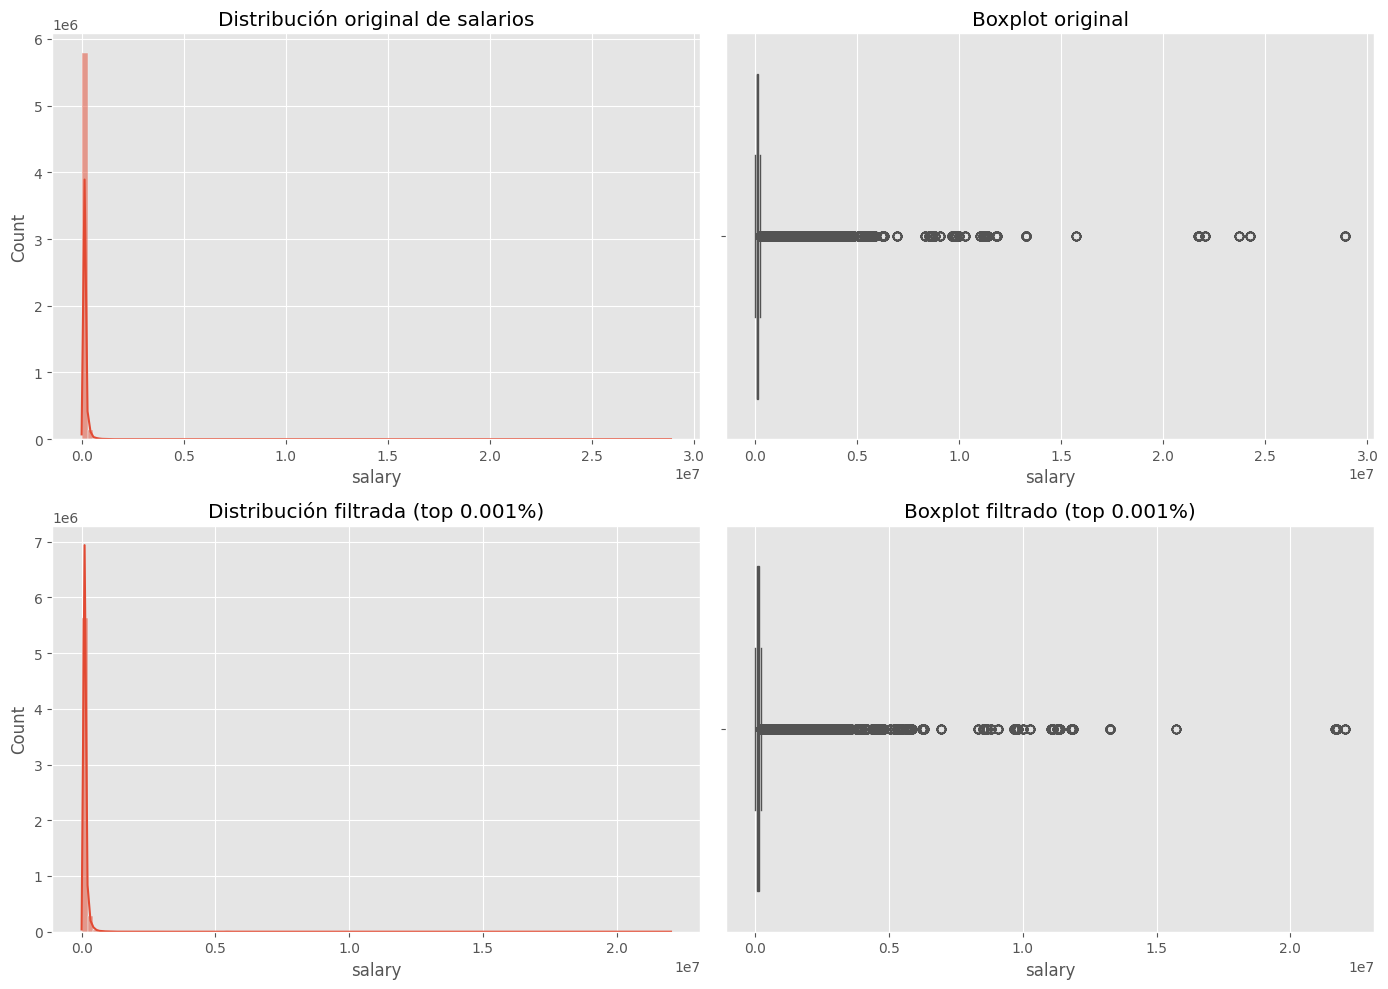

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia original
salary_original = df_x['salary'].dropna()

# Eliminar top 0.001%
umbral_top_0001 = df_x['salary'].quantile(0.99999)
df_x_filtrado = df_x[df_x['salary'] <= umbral_top_0001]
salary_filtrado = df_x_filtrado['salary'].dropna()

# Gráficos comparativos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(salary_original, bins=100, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución original de salarios")

sns.boxplot(x=salary_original, ax=axes[0, 1])
axes[0, 1].set_title("Boxplot original")

sns.histplot(salary_filtrado, bins=100, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribución filtrada (top 0.001%)")

sns.boxplot(x=salary_filtrado, ax=axes[1, 1])
axes[1, 1].set_title("Boxplot filtrado (top 0.001%)")

plt.tight_layout()
plt.show()



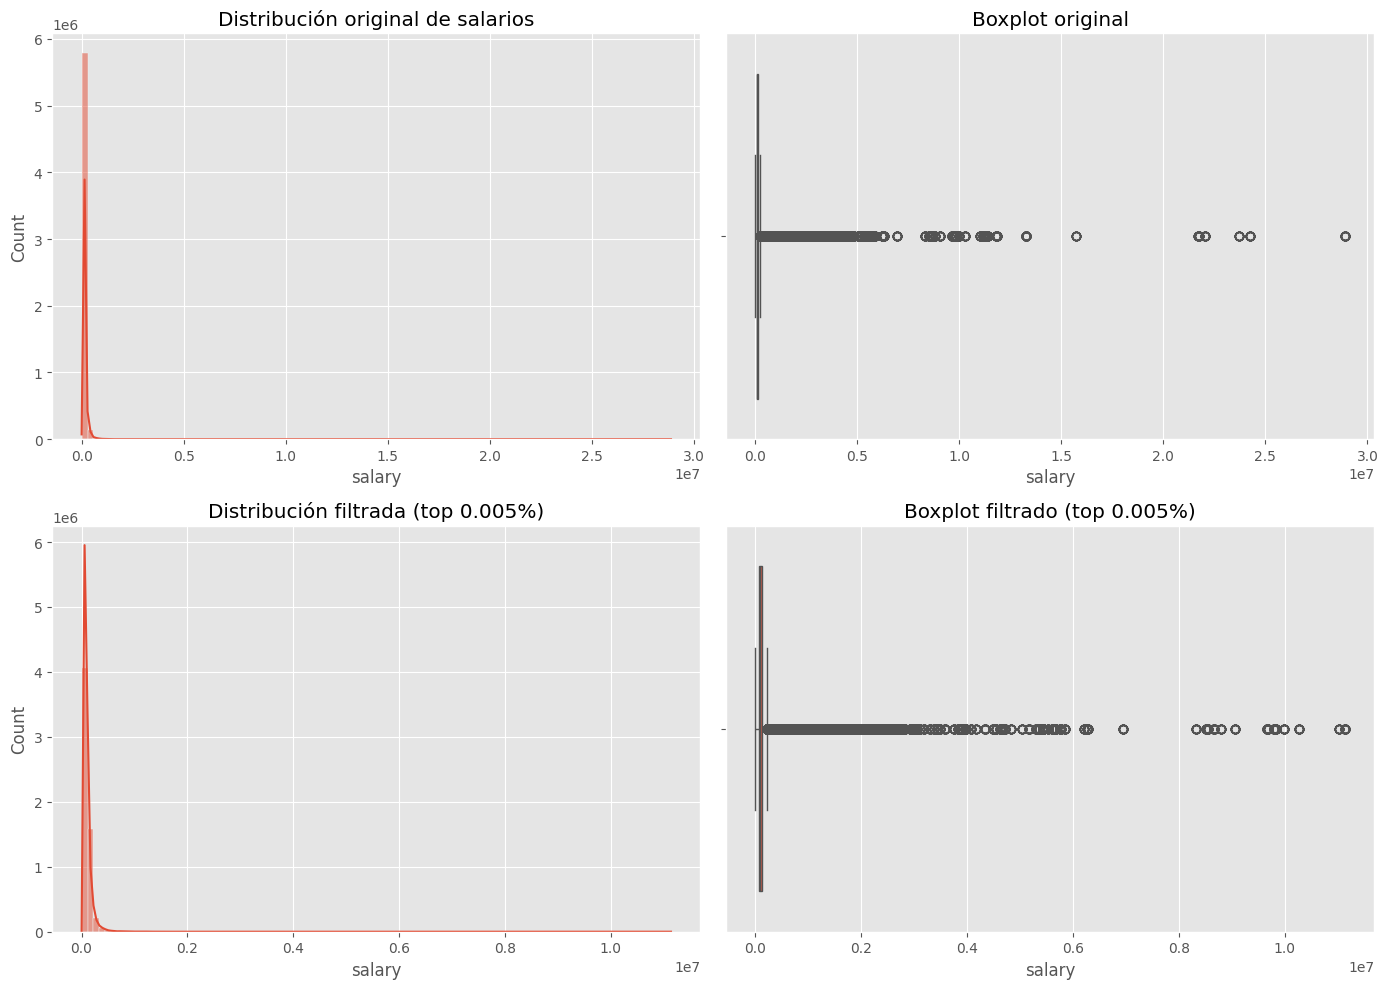

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salario original
salary_original = df_x['salary'].dropna()

# Eliminar top 0.005%
umbral_top_0005 = df_x['salary'].quantile(0.99995)
df_x_filtrado = df_x[df_x['salary'] <= umbral_top_0005]
salary_filtrado = df_x_filtrado['salary'].dropna()

# Gráficos comparativos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(salary_original, bins=100, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución original de salarios")

sns.boxplot(x=salary_original, ax=axes[0, 1])
axes[0, 1].set_title("Boxplot original")

sns.histplot(salary_filtrado, bins=100, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribución filtrada (top 0.005%)")

sns.boxplot(x=salary_filtrado, ax=axes[1, 1])
axes[1, 1].set_title("Boxplot filtrado (top 0.005%)")

plt.tight_layout()
plt.show()


In [ ]:
umbral_top_0005 = df_x['salary'].quantile(0.99995)
df_x = df_x[df_x['salary'] <= umbral_top_0005]


In [ ]:
df_x.isnull().sum()

,0
pk_cid,0
pk_partition,0
short_term_deposit,0
loans,0
mortgage,0
funds,0
securities,0
long_term_deposit,0
credit_card,0
payroll,0


In [ ]:
# Asegurar que region_code sea string
df_x['region_code'] = df_x['region_code'].astype(str)

# One-hot encoding solo a las categóricas
df_x = pd.get_dummies(df_x,
                      columns=['region_code', 'entry_channel', 'segment'],
                      drop_first=True)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import pandas as pd

# Convertir fechas y calcular antigüedad
df_x['entry_date'] = pd.to_datetime(df_x['entry_date'])
df_x['pk_partition'] = pd.to_datetime(df_x['pk_partition'])
df_x['antiguedad_meses'] = ((pd.to_datetime('2019-05-01') - df_x['entry_date']).dt.days // 30).astype(int)
df_x = df_x[df_x['deceased'] == 0]

productos = ['debit_card', 'pension_plan', 'payroll', 'credit_card', 'long_term_deposit', 'short_term_deposit', 'credit_card']
resultados = {}

for producto_nombre in productos:
    print(f"\n{'='*60}\n PRODUCTO: {producto_nombre}\n{'='*60}")

    producto_codigo = dict_nombre_a_codigo[producto_nombre]
    df_target = df_sales[df_sales['product_ID'] == str(producto_codigo)][['pk_cid', 'month_sale']].copy()
    df_target['target'] = 1
    df_target['pk_partition'] = pd.to_datetime(df_target['month_sale'].apply(lambda d: d - relativedelta(months=1)))
    df_target.drop(columns=['month_sale'], inplace=True)

    # Predicción para mayo 2019
    x_pred = df_x[df_x['pk_partition'] == '2019-05-01'].copy()
    x_pred_ids = x_pred[['pk_cid', 'pk_partition']].copy()

    # Dataset de entrenamiento (antes de mayo 2019)
    x_train = df_x[df_x['pk_partition'] < '2019-05-01'].copy()
    x_train = x_train.merge(df_target, on=['pk_cid', 'pk_partition'], how='left')
    x_train['target'] = x_train['target'].fillna(0).astype(int)

    # Balanceo realista
    df_train_pos = x_train[x_train['target'] == 1]

    df_train_neg_eligibles = x_train[
        (x_train['target'] == 0) &
        (x_train['salary'] > 0) &
        (x_train['antiguedad_meses'] >= 3)
    ]

    df_train_neg = df_train_neg_eligibles.sample(n=len(df_train_pos), random_state=42)
    df_train_balanced = pd.concat([df_train_pos, df_train_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Eliminar variables de fuga y columnas no válidas
    columnas_productos = ['short_term_deposit', 'long_term_deposit', 'credit_card',
                          'payroll', 'pension_plan', 'debit_card', 'payroll_account',
                          'em_acount', 'emc_account', 'loans', 'mortgage', 'funds', 'securities']
    columnas_fuga = [col for col in columnas_productos if col != producto_nombre and col in df_train_balanced.columns]
    columnas_a_eliminar = ['pk_cid', 'pk_partition', 'target', 'entry_date', 'deceased'] + columnas_fuga

    X_train = df_train_balanced.drop(columns=[col for col in columnas_a_eliminar if col in df_train_balanced.columns])
    y_train = df_train_balanced['target']

    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=5,
        eval_metric='AUC',
        verbose=0,
        random_state=42
    )
    model.fit(X_tr, y_tr)

    # AUC
    y_tr_proba = model.predict_proba(X_tr)[:, 1]
    train_auc = roc_auc_score(y_tr, y_tr_proba)

    y_val_proba = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)

    print(f"✅ AUC Entrenamiento: {round(train_auc, 4)}")
    print(f"✅ AUC Validación   : {round(val_auc, 4)}")

    print("\n📊 Classification Report en validación:")
    print(classification_report(y_val, model.predict(X_val)))

    # Importancia de variables
    importances = model.get_feature_importance(prettified=True)
    print("\n🔍 Top 10 variables más importantes:")
    print(importances.head(10))

    # Predicción para mayo 2019
    X_pred = x_pred[X_train.columns]
    x_pred['score'] = model.predict_proba(X_pred)[:, 1]

    df_resultado = x_pred_ids.copy()
    df_resultado['producto'] = producto_nombre
    df_resultado['score'] = x_pred['score']

    top15 = df_resultado.sort_values('score', ascending=False).head(15)
    print("\n Top 15 clientes más propensos:")
    print(top15)

    resultados[producto_nombre] = {
        'modelo': model,
        'predicciones': df_resultado[['pk_cid', 'score']]
    }



 PRODUCTO: debit_card
✅ AUC Entrenamiento: 0.8975
✅ AUC Validación   : 0.8956

📊 Classification Report en validación:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     11256
           1       0.78      0.90      0.84     11256

    accuracy                           0.82     22512
   macro avg       0.83      0.82      0.82     22512
weighted avg       0.83      0.82      0.82     22512


🔍 Top 10 variables más importantes:
              Feature Id  Importances
0             debit_card    48.670104
1        active_customer    26.263428
2       antiguedad_meses    10.434191
3                    age     5.593289
4      entry_channel_KHE     1.814796
5        segment_missing     1.045962
6      entry_channel_KHQ     1.027627
7  segment_UNIVERSITARIO     0.931046
8  entry_channel_missing     0.643046
9                 salary     0.519225

 Top 15 clientes más propensos:
          pk_cid pk_partition    producto     score
5683735  15484

# CLUSTERING

## MODELO 1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Merge de tablas base
df_x_cluster = df_customer_products.merge(df_socio_demo, on=['pk_cid', 'pk_partition'], how='left')
df_x_cluster = df_x_cluster.merge(df_commercial_activity, on=['pk_cid', 'pk_partition'], how='left')

# 2. Filtrar clientes vivos
df_x_cluster = df_x_cluster[df_x_cluster['deceased'] == 0].copy()

# 3. Convertir fechas y calcular antigüedad
df_x_cluster['entry_date'] = pd.to_datetime(df_x_cluster['entry_date'])
df_x_cluster['pk_partition'] = pd.to_datetime(df_x_cluster['pk_partition'])
df_x_cluster['antiguedad_meses'] = ((pd.to_datetime('2019-05-01') - df_x_cluster['entry_date']) / np.timedelta64(1, 'D')) / 30.44
df_x_cluster['antiguedad_meses'] = df_x_cluster['antiguedad_meses'].astype(int)

# 4. Eliminar columnas innecesarias
df_x_cluster.drop(columns=['entry_date', 'deceased', 'region_code'], inplace=True, errors='ignore')

# 5. Crear variables por familia de productos
df_x_cluster['category_investment'] = (
    df_x_cluster['short_term_deposit'] + df_x_cluster['long_term_deposit'] +
    df_x_cluster['funds'] + df_x_cluster['securities'] + df_x_cluster['pension_plan']
)

df_x_cluster['category_financing'] = (
    df_x_cluster['loans'] + df_x_cluster['mortgage'] + df_x_cluster['credit_card']
)

df_x_cluster['category_accounts'] = (
    df_x_cluster['emc_account'] + df_x_cluster['em_acount'] +
    df_x_cluster['payroll_account'] + df_x_cluster['payroll'] + df_x_cluster['debit_card']
)

# 6. Total productos
df_x_cluster['n_productos'] = (
    df_x_cluster['category_investment'] + df_x_cluster['category_financing'] + df_x_cluster['category_accounts']
)

# 7. Eliminar outliers extremos
umbral_salary = df_x_cluster['salary'].quantile(0.98)
df_x_cluster = df_x_cluster[(df_x_cluster['age'] <= 100) & (df_x_cluster['salary'] <= umbral_salary)]

# 8. Filtrar clientes activos en mayo 2019
df_cluster = df_x_cluster[df_x_cluster['pk_partition'] == '2019-05-01'].copy()

# 9. Seleccionar variables para clustering
cols_finales = [
    'pk_cid', 'age', 'gender', 'salary', 'antiguedad_meses', 'active_customer',
    'category_investment', 'category_financing', 'category_accounts', 'n_productos'
]
df_cluster_reducido = df_cluster[cols_finales].copy()

# 10. Escalado de variables numéricas
variables_numericas = ['age', 'salary', 'antiguedad_meses', 'category_investment', 'category_financing', 'category_accounts', 'n_productos']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster_reducido[variables_numericas]), columns=variables_numericas, index=df_cluster_reducido.index)

# 11. Concatenar con variable binaria
df_cluster_ready = pd.concat([df_scaled, df_cluster_reducido[['active_customer']]], axis=1)


In [ ]:
df_cluster_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434759 entries, 5519929 to 5962923
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   pk_cid               434759 non-null  object
 1   age                  434759 non-null  int64 
 2   gender               434759 non-null  int64 
 3   salary               434759 non-null  int64 
 4   antiguedad_meses     434759 non-null  int64 
 5   active_customer      434759 non-null  int64 
 6   category_investment  434759 non-null  int64 
 7   category_financing   434759 non-null  int64 
 8   category_accounts    434759 non-null  int64 
 9   n_productos          434759 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 36.5+ MB


In [ ]:
df_cluster_reducido["salary"].describe().round(2)

,salary
count,434759.00
mean,98648.55
std,48977.82
min,1203.00
25%,66002.00
50%,87083.00
75%,124778.00
max,334552.00


In [ ]:
df_cluster_reducido["age"].describe().round(2)

,age
count,434759.00
mean,30.39
std,12.20
min,2.00
25%,22.00
50%,25.00
75%,35.00
max,100.00


In [ ]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_cluster_reducido) #il nome del database qui

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


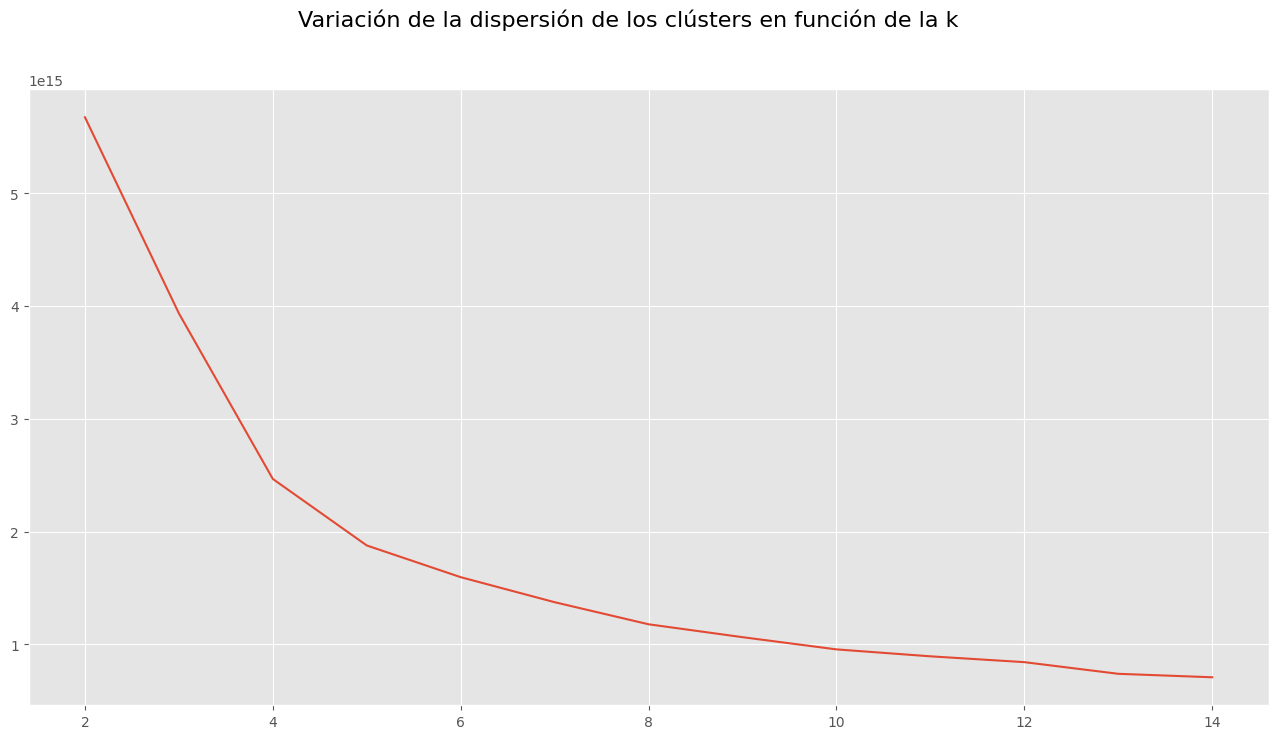

In [ ]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [ ]:
# Fit the KMeans model with the desired number of clusters
kmeans_model = KMeans(n_clusters=6, random_state=175)
kmeans_model.fit(df_cluster_reducido)

# Access the labels after fitting
labels = kmeans_model.labels_

# Add the labels to the DataFrame if needed
df_cluster_reducido['cluster'] = labels

# Display the updated DataFrame
print(df_cluster_reducido.head())

         pk_cid  age  gender  salary  antiguedad_meses  active_customer  \
5519929  657826   44       1   54493                47                1   
5519930  657817   32       0  124778                 0                0   
5519931  657986   39       1  100993                38                1   
5519932  657905   85       1  154059                26                1   
5519933  657336   38       0  126383                 2                1   

         category_investment  category_financing  category_accounts  \
5519929                    0                   0                  1   
5519930                    0                   0                  0   
5519931                    1                   1                  4   
5519932                    1                   0                  1   
5519933                    0                   0                  1   

         n_productos  cluster  
5519929            1        2  
5519930            0        2  
5519931            6      

In [ ]:
df_cluster_reducido['cluster'].value_counts()

,count
cluster,
1,118216
3,98186
4,97287
0,95116
5,22961
2,2993


In [ ]:
# Define float_format for formatting floating-point numbers
float_format = "{:.2f}".format

# Group by 'cluster' and describe the DataFrame
(df_cluster_reducido
    .groupby(by=["cluster"])
    .describe()
    .T
    .style
    .format(float_format)
    .background_gradient(cmap='Blues', axis=1)
)

In [ ]:
ficha_df = pd.DataFrame()

In [ ]:


for i, col in enumerate(["age","gender","antiguedad_meses","salary","n_productos","category_investment","category_financing","category_accounts"]):
    resumen_data = df_cluster_reducido[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [ ]:
ficha_df.head(10).T

age                                              gender  \
              mean        std   min   25%   50%   75%    max      mean   
cluster                                                                  
0        30.371199  11.299125   4.0  23.0  25.0  35.0   98.0  0.516979   
1        28.930390  12.364663   2.0  21.0  23.0  34.0  100.0  0.511048   
2        54.385900  13.326089   2.0  45.0  52.0  62.0  100.0  0.652188   
3        30.333327  12.349723   3.0  22.0  25.0  36.0  100.0  0.510633   
4        31.428115  11.533789   5.0  24.0  26.0  36.0  100.0  0.518199   
5        30.612604  13.059508  18.0  22.0  24.0  35.0   97.0  0.500327   

                        
              std  min  
cluster                 
0        0.499714  0.0  
1        0.499880  0.0  
2        0.476355  0.0  
3        0.499889  0.0  
4        0.499671  0.0  
5        0.500011  0.0

In [ ]:
# generamos nuestro multiindex vuoto con una combinazione di nomi
# y lo rellenamos con los nombres de las columnas que nos interesan
out_index = [
    "Sociodemográficos",
    "Sociodemográficos",
    "Sociodemográficos",
    "Monetarios",
    "Monetarios",
    "Productos",
    "Productos",
    "Productos",
]

inner_index = [
    "age",
    "gender",
    "antiguedad_meses",
    "salary",
    "n_productos",
    "category_investment",
    "category_financing",
    "category_accounts"

]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [ ]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [ ]:
pd.MultiIndex

pandas.core.indexes.multi.MultiIndex

In [ ]:
names = ["Gruop Indicator", "Indicator", "Statistics"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [ ]:
tamaño_clusters = df_cluster_reducido.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Size")] , names), inplace = True)

In [ ]:
ficha_df = pd.concat([tamaño_clusters, ficha_df])

In [ ]:
float_format = '{:.2f}'

ficha_df.style.format(float_format).background_gradient(cmap = 'Blues', axis = 1)

In [ ]:
df_cluster_reducido['pk_cid'].nunique()

434759

In [ ]:
df_cluster_reducido.head()


,pk_cid,age,gender,salary,antiguedad_meses,active_customer,category_investment,category_financing,category_accounts,n_productos,cluster
5519929,657826,44,1,54493,47,1,0,0,1,1,2
5519930,657817,32,0,124778,0,0,0,0,0,0,2
5519931,657986,39,1,100993,38,1,1,1,4,6,2
5519932,657905,85,1,154059,26,1,1,0,1,2,2
5519933,657336,38,0,126383,2,1,0,0,1,1,2


**Cluster 0 – “Clientes consolidados y activos”**
Tamaño: 95116 clientes
Edad media: 30,3 años
Antigüedad: 38,9 meses
Salario: ~87.700 €
Productos: 1,0 (en promedio)
Categoría destacada: cuentas (0,97), poco en financiación o inversión
Clientes con mayor uso del banco, fidelizados, perfil equilibrado. Ideales para ampliar servicios.


**Cluster 1 – “Clientes nuevos y pasivos”**
Tamaño: 118216 clientes
Edad media: 29,6 años
Antigüedad: 5,5 meses
Salario: ~94.500 €
Productos: 0,88
Categoría destacada: cuentas (0,83), poco en financiación o inversión
Jóvenes recientes, aún poco vinculados. Buen target para onboarding o activación comercial.

**Cluster 2 – “Clientes expertos de alto potencial”**
Tamaño: 2993 clientes
Edad media: 54,3 años
Antigüedad: 23,3 meses
Salario medio: 123.500 €
Productos: 1,29
Categoría destacada: cuentas: (0,98), inversion (0,25)
Grupo más pequeño, alto poder adquisitivo. Ideal para ofertas premium.

**Cluster 3 – “Clientes medios equilibrados”**
Tamaño: 98186 clientes
Edad media: 30,3 años
Antigüedad: 17,2 meses
Salario: 83.600 €
Productos: 0,98
Categoría destacada: cuentas: (0,98), poco en financiación o inversión
Nuevos clientes con mayor uso del banco, perfil equilibrado. Ideales para ampliar servicios.

**Cluster 4 – “Clientes historico poco potencial”**
Tamaño: 97287 clientes
Edad media: 31,4 años
Antigüedad: 42,2 meses
Salario: 101.700 €
Productos: 1,08
Categoría destacada: cuentas: (1), muy poco en financiación o inversión
Clientes historico, uso del banco principalmente en la cuenta coriente, muy poco potencial.

**Cluster 5 – “Clientes muy alto potencial”**
Tamaño: 22961 clientes
Edad media: 30,6 años
Antigüedad: 22,2 meses
Salario: 220.500 €
Productos: 0,96
Categoría destacada: cuentas: (1), muy poco en financiación o inversión
Nuevos clientes, muy alto poder acquisitivo uso del banco principalmente en la cuenta coriente. Ideales para ampliar servicios en financiacion y inversion.

# CASO DE USO

In [ ]:
df_scores_clusters = []

for producto, datos in resultados.items():
    df_pred = datos['predicciones'].copy()
    df_pred['producto'] = producto
    df_merge = df_pred.merge(df_cluster_reducido, on='pk_cid')
    df_scores_clusters.append(df_merge)

df_all_scores = pd.concat(df_scores_clusters)


In [ ]:
df_scores_clusters

[         pk_cid     score    producto  age  gender  salary  antiguedad_meses  \
 0        657826  0.541276  debit_card   44       1   54493                47   
 1        657817  0.976227  debit_card   32       0  124778                 0   
 2        657986  0.004652  debit_card   39       1  100993                38   
 3        657905  0.488936  debit_card   85       1  154059                26   
 4        657336  0.990133  debit_card   38       0  126383                 2   
 ...         ...       ...         ...  ...     ...     ...               ...   
 434754  1166765  0.042346  debit_card   22       0   43912                32   
 434755  1166764  0.075920  debit_card   23       0   23335                32   
 434756  1166763  0.491481  debit_card   47       1   95428                32   
 434757  1166789  0.022590  debit_card   22       1  199593                32   
 434758  1550586  0.996676  debit_card   37       1  125997                 0   
 
         active_customer  

In [ ]:
pivot = df_all_scores.groupby(['cluster', 'producto'])['score'].mean().reset_index()
pivot = pivot.sort_values(['cluster', 'score'], ascending=[True, False])


In [ ]:
top_productos = pivot.groupby('cluster').head(1)

top_productos

,cluster,producto,score
4,0,pension_plan,0.255845
10,1,pension_plan,0.411810
12,2,credit_card,0.623565
22,3,pension_plan,0.304752
27,4,payroll,0.237472
33,5,payroll,0.306533


In [ ]:
top_3productos = pivot.groupby('cluster').head(3)

top_3productos

,cluster,producto,score
4,0,pension_plan,0.255845
3,0,payroll,0.255455
0,0,credit_card,0.227794
10,1,pension_plan,0.411810
9,1,payroll,0.406471
7,1,debit_card,0.388060
12,2,credit_card,0.623565
14,2,long_term_deposit,0.592476
16,2,pension_plan,0.471711
22,3,pension_plan,0.304752


## PENSION PLAN

In [ ]:
# 1. Lista de clientes que realmente contrataron el producto
clientes_compraron = df_customer_products[df_customer_products['pension_plan'] == 1]['pk_cid']

# 2. Añadir columna 'comprado' al DataFrame de predicciones
df_pred = resultados['pension_plan']['predicciones'].copy()
df_pred['comprado'] = df_pred['pk_cid'].isin(clientes_compraron).astype(int)


In [ ]:
# 3. Merge con cluster
df_merged = df_pred.merge(df_cluster_reducido, on='pk_cid', how='inner')

# 4. Tasa de conversión real por cluster
conversion_real = df_merged.groupby('cluster')['comprado'].mean().reset_index(name='tasa_conversion')



In [ ]:
productos = ['pension_plan', 'credit_card', 'payroll']
resultados_comparacion = []

for producto in productos:
    # 1. Clientes que realmente contrataron el producto
    clientes_compraron = df_customer_products[df_customer_products[producto] == 1]['pk_cid']

    # 2. DataFrame de predicciones
    df_pred = resultados[producto]['predicciones'].copy()
    df_pred['comprado'] = df_pred['pk_cid'].isin(clientes_compraron).astype(int)

    # 3. Merge con clusters
    df_merged = df_pred.merge(df_cluster_reducido, on='pk_cid', how='inner')

    # 4. Score medio por cluster
    score_medio = df_merged.groupby('cluster')['score'].mean().reset_index(name='score_medio')

    # 5. Tasa de conversión real por cluster
    conversion_real = df_merged.groupby('cluster')['comprado'].mean().reset_index(name='tasa_conversion')

    # 6. Merge de ambos resultados y añadir nombre del producto
    comparacion = score_medio.merge(conversion_real, on='cluster')
    comparacion['producto'] = producto

    resultados_comparacion.append(comparacion)

# 7. Unir todo en un solo DataFrame
df_comparacion_total = pd.concat(resultados_comparacion, ignore_index=True)


In [ ]:
df_comparacion_total

,cluster,score_medio,tasa_conversion,producto
0,0,0.255845,0.076706,pension_plan
1,1,0.411810,0.038345,pension_plan
2,2,0.471711,0.114601,pension_plan
3,3,0.304752,0.070377,pension_plan
4,4,0.236602,0.066669,pension_plan
5,5,0.298899,0.074779,pension_plan
6,0,0.227794,0.024633,credit_card
7,1,0.274155,0.004153,credit_card
8,2,0.623565,0.118610,credit_card
9,3,0.218575,0.012385,credit_card


### Margen medio por producto

In [ ]:
# 1. Calcular margen medio por producto_ID
margen_por_producto = df_sales.groupby('product_ID')['net_margin'].mean().reset_index()
margen_por_producto.columns = ['pk_product_ID', 'margen_medio']

# 2. Unir con descripciones
df_margen_descripciones = margen_por_producto.merge(df_product_description, on='pk_product_ID', how='left')

# 3. Filtrar productos que te interesan
productos_clave = ['pension_plan', 'credit_card', 'payroll']  # nombres que aparecen en 'product_desc'
df_margen_final = df_margen_descripciones[
    df_margen_descripciones['product_desc'].str.lower().isin(productos_clave)
]


In [ ]:
df_margen_descripciones

,pk_product_ID,margen_medio,product_desc,family_product
0,1119,1499.053409,funds,investment
1,1364,5976.433012,pension_plan,pension_plan
2,2234,69.933013,payroll,account
3,2235,69.967311,payroll_account,account
4,2312,60.014406,credit_card,payment_card
5,2335,1486.431885,short_term_deposit,investment
6,2336,1496.910338,long_term_deposit,investment
7,2673,1497.829732,securities,investment
8,3819,60.004712,debit_card,payment_card
9,4033,2532.500000,mortgage,loan


## Tasa de conversión

In [ ]:
conversion_real = df_merged.groupby('cluster')['comprado'].mean().reset_index(name='tasa_conversion')


In [ ]:
conversion_real

,cluster,tasa_conversion
0,0,0.073342
1,1,0.036552
2,2,0.093886
3,3,0.067372
4,4,0.063811
5,5,0.071425
